## IF_Futures

#### CSI : http://www.csindex.com.cn/en/indices/index-detail/000905
#### 價差 : http://a0.pise.pw/KZ3PX

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\寒假作業\\TMBA-20200108\\IF'
Data_Path = os.path.join(dir_data, 'IF-60-None-0.txt')
IF = pd.read_csv(Data_Path, engine='python')
IF.dropna(how='any',inplace=True)
IF.columns = ['Date_Time','Open','High','Low','Close','TotalVolume', 'Drop']
IF = IF.drop(columns = ['Drop'])
IF['Date'] = IF['Date_Time'].str.split(pat = " ", expand=True).iloc[:, 0]
IF['Time'] = IF['Date_Time'].str.split(pat = " ", expand=True).iloc[:, 1]
IF.Date = pd.to_datetime(IF.Date)
# Create Year & month & Return
IF['Year'] = IF['Date'].map(lambda x: x.year)
IF['Month'] = IF['Date'].map(lambda x: x.month)
IF['Week_day'] = IF['Date'].map(lambda x: x.weekday() + 1)
IF['Range'] = IF['High'] - IF['Low']
IF['Diff'] = IF['Close'] - IF['Open']
IF['Rotate'] = abs(IF['Diff']) / IF['Range']
IF['Up_down'] = IF['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
IF['Return'] = ((IF['Close'] - IF['Open']) / IF['Open'])*100
IF['P_Return'] = ((IF['High'] - IF['Low']) / IF['Low'])*100
# Sort IF by Date
IF = IF.sort_values(by = ['Date_Time'])
Year_sorted = np.sort(IF.Year.unique())
IF.head()

,Date_Time,Open,High,Low,Close,TotalVolume,Date,Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return
0,2010/04/16 09:15:00,3456.0,3488.0,3453.0,3470.0,303,2010-04-16,09:15:00,2010,4,5,35.0,14.0,0.400000,1,0.405093,1.013611
1,2010/04/16 09:16:00,3468.0,3473.8,3467.0,3467.0,827,2010-04-16,09:16:00,2010,4,5,6.8,-1.0,0.147059,-1,-0.028835,0.196135
2,2010/04/16 09:17:00,3467.0,3471.0,3466.0,3467.0,828,2010-04-16,09:17:00,2010,4,5,5.0,0.0,0.000000,0,0.000000,0.144259
3,2010/04/16 09:18:00,3467.0,3468.2,3448.0,3448.0,1046,2010-04-16,09:18:00,2010,4,5,20.2,-19.0,0.940594,-1,-0.548024,0.585847
4,2010/04/16 09:19:00,3448.0,3460.0,3448.0,3454.0,1043,2010-04-16,09:19:00,2010,4,5,12.0,6.0,0.500000,1,0.174014,0.348028


In [3]:
# Split time
time = IF['Time'].str.split(':', 2, expand = True)
IF['Hour'] = time[0].astype(int)
IF['Min'] = time[1].astype(int)
IF.head()

,Date_Time,Open,High,Low,Close,TotalVolume,Date,Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2010/04/16 09:15:00,3456.0,3488.0,3453.0,3470.0,303,2010-04-16,09:15:00,2010,4,5,35.0,14.0,0.400000,1,0.405093,1.013611,9,15
1,2010/04/16 09:16:00,3468.0,3473.8,3467.0,3467.0,827,2010-04-16,09:16:00,2010,4,5,6.8,-1.0,0.147059,-1,-0.028835,0.196135,9,16
2,2010/04/16 09:17:00,3467.0,3471.0,3466.0,3467.0,828,2010-04-16,09:17:00,2010,4,5,5.0,0.0,0.000000,0,0.000000,0.144259,9,17
3,2010/04/16 09:18:00,3467.0,3468.2,3448.0,3448.0,1046,2010-04-16,09:18:00,2010,4,5,20.2,-19.0,0.940594,-1,-0.548024,0.585847,9,18
4,2010/04/16 09:19:00,3448.0,3460.0,3448.0,3454.0,1043,2010-04-16,09:19:00,2010,4,5,12.0,6.0,0.500000,1,0.174014,0.348028,9,19


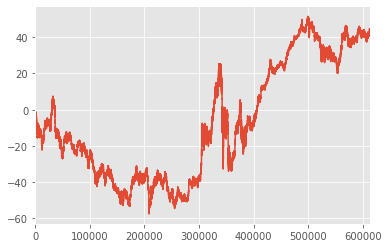

In [4]:
IF['Return'].cumsum().plot()

In [4]:
# Calculate consecutive ups and downs
# ref:https://codereview.stackexchange.com/questions/138550/count-consecutive-ones-in-a-binary-list
def Go_up_num(Series):
    positive_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == 1:
            current += 1
        else:
            longest = max(longest, current)
            positive_list.append(longest)
            current = 0
    return positive_list

def Go_down_num(Series):
    negative_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == -1:
            current += 1
        else:
            longest = max(longest, current)
            negative_list.append(longest)
            current = 0
    return negative_list

In [9]:
#Split data (Train/ Test)
start_date = datetime.strptime('2010-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2014-12-31', '%Y-%m-%d')
start_date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
end_date1 = datetime.strptime('2020-12-31', '%Y-%m-%d')
msk = (IF['Date'] <= end_date) & (IF['Date'] >= start_date)
msk2 = (IF['Date'] <= end_date1) & (IF['Date'] >= start_date1)
IF_train = IF.loc[msk]
IF_test = IF.loc[msk2]

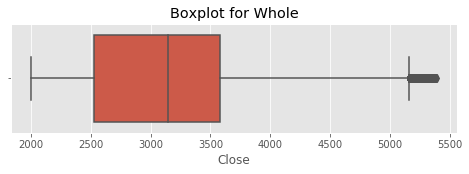

In [5]:
# Box plot for Whole
plt.figure(figsize=(8,2))    
sns.boxplot(IF.loc[:, 'Close'])
plt.title('Boxplot for Whole')
plt.show()

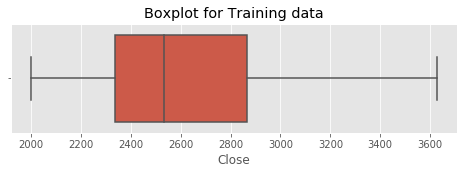

In [12]:
# Box plot for Training data
plt.figure(figsize=(8,2))    
sns.boxplot(IF_train.loc[:, 'Close'])
plt.title('Boxplot for Training data')
plt.show()

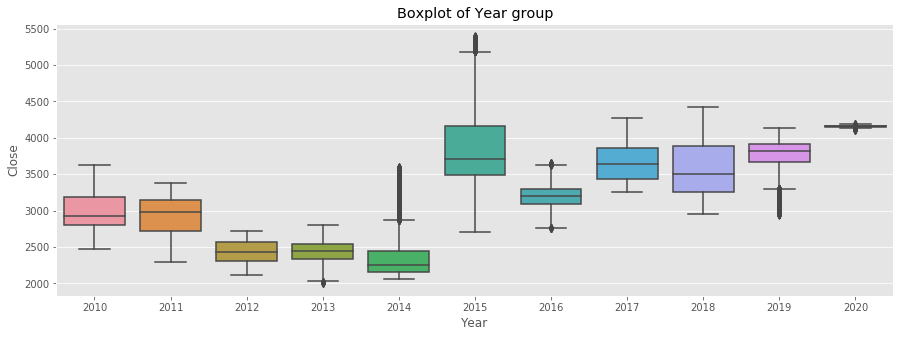

In [6]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(15,5))
sns.boxplot(x='Year', y='Close', data=IF)
plt.title('Boxplot of Year group')
plt.show()

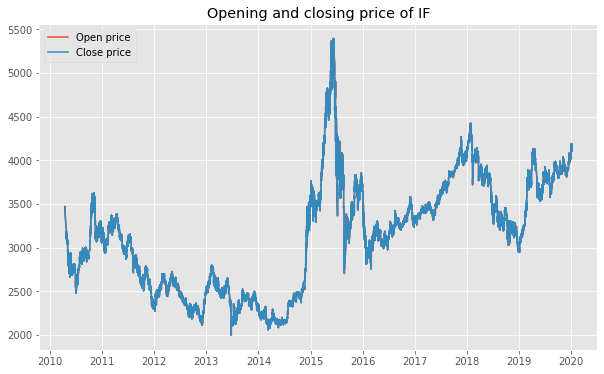

In [7]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price of IF")
plt.plot(IF['Date'], IF['Open'], label='Open price')
plt.plot(IF['Date'], IF['Close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'IF Return_rolling_var_Mink')

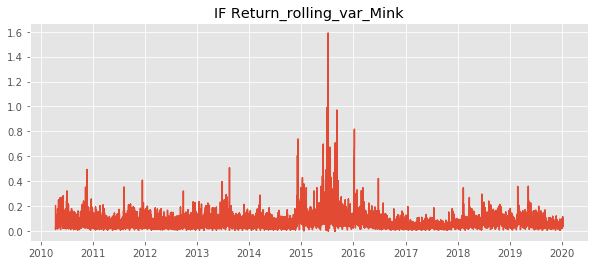

In [13]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(IF.Date,IF['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink(Training)')

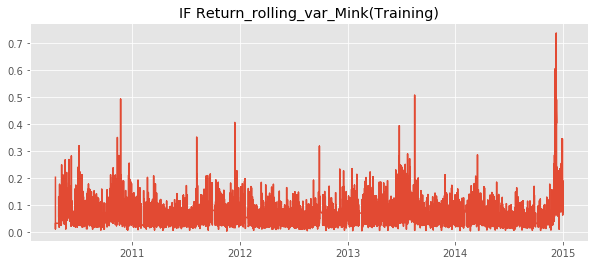

In [14]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(IF_train.Date,IF_train['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink(Training)')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During Month')

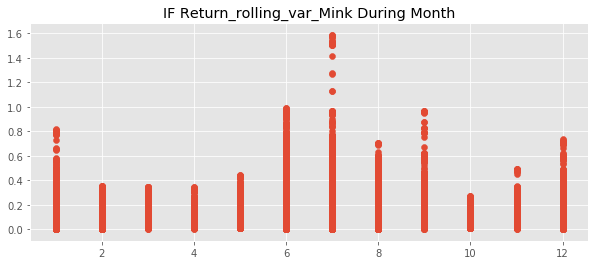

In [15]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(IF.Month,IF['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During Month')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During Month (Training)')

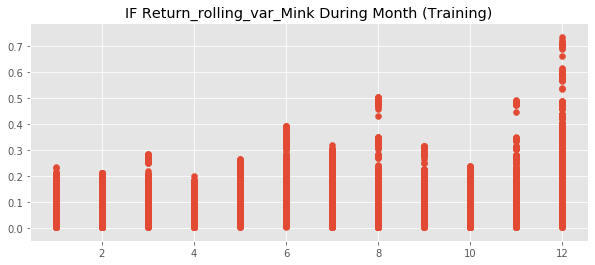

In [16]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(IF_train.Month,IF_train['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During Month (Training)')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During Week_Day')

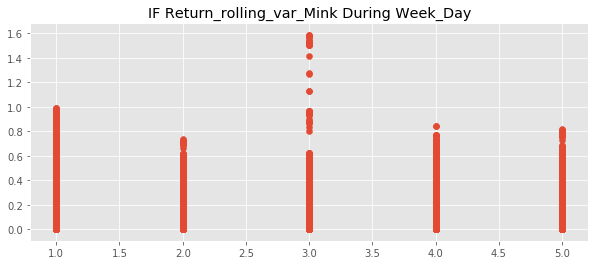

In [17]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(IF.Week_day,IF['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During Week_Day')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During Week_Day (Training)')

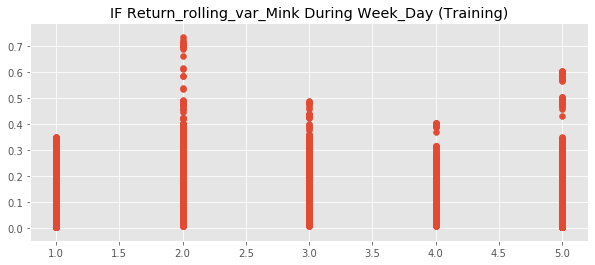

In [18]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(IF_train.Week_day,IF_train['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During Week_Day (Training)')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During day')

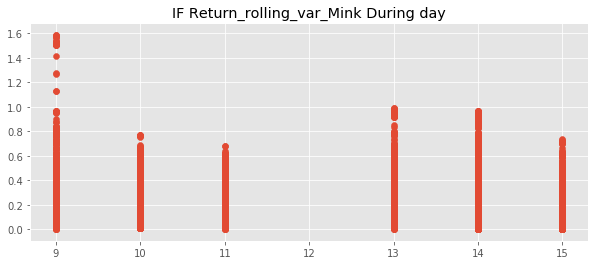

In [19]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(IF.Hour,IF['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During day')

Text(0.5, 1.0, 'IF Return_rolling_var_Mink During day(training)')

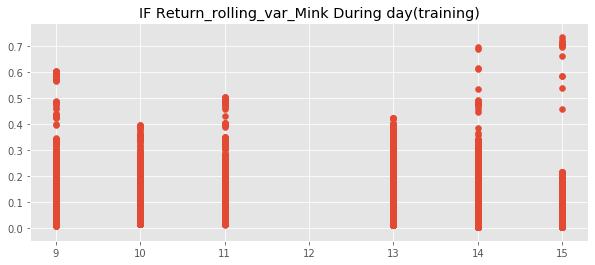

In [20]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(IF_train.Hour,IF_train['Return'].rolling(20).std())
plt.title('IF Return_rolling_var_Mink During day(training)')

Text(0.5, 1.0, 'IF P_Return_rolling_var_Mink')

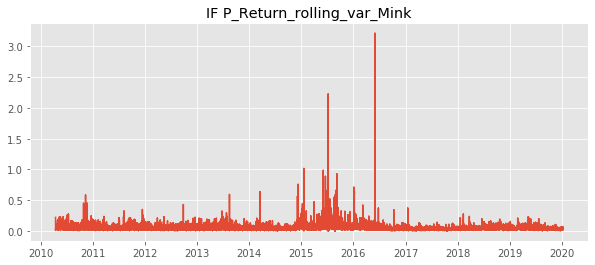

In [21]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(IF.Date,IF['P_Return'].rolling(20).std())
plt.title('IF P_Return_rolling_var_Mink')

Text(0.5, 1.0, 'IF P_Return_rolling_var_Mink(training)')

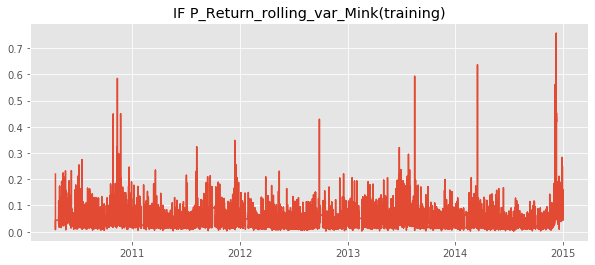

In [22]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(IF_train.Date,IF_train['P_Return'].rolling(20).std())
plt.title('IF P_Return_rolling_var_Mink(training)')

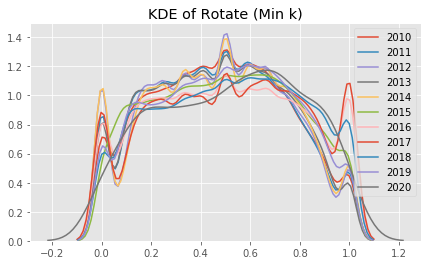

In [23]:
# Rotate
IF['Rotate'] = IF['Rotate'].replace([np.inf, -np.inf], np.nan)
IF['Rotate'].dropna(how='any',inplace=True)
# KDE of Rotate (Min k)
Year_sorted = np.sort(IF.Year.unique())
plt.figure(figsize=(7,4))
for i in range(len(Year_sorted)):
    sns.kdeplot(IF.loc[(IF['Year'] == Year_sorted[i]),'Rotate'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Min k)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Go_up_num_Mink')

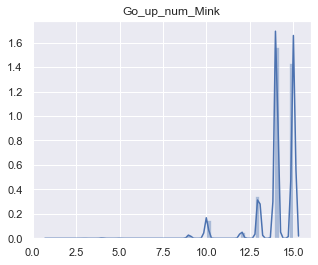

In [34]:
# Go_up_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(IF['Up_down'])).set_title("Go_up_num_Mink")

Text(0.5, 1.0, 'Go_up_num_Mink_train')

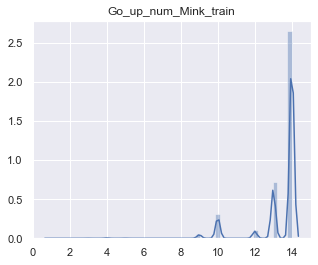

In [30]:
# Go_up_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(IF_train['Up_down'])).set_title("Go_up_num_Mink_train")

Text(0.5, 1.0, 'Go_up_num_Mink_test')

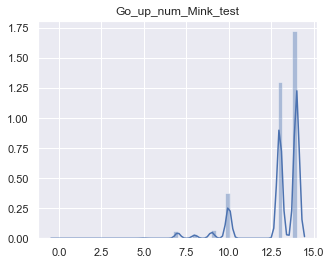

In [31]:
# Go_up_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(IF_test['Up_down'])).set_title("Go_up_num_Mink_test")

Text(0.5, 1.0, 'Go_down_num_Mink')

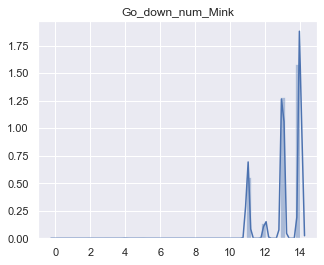

In [35]:
# Go_down_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(IF['Up_down'])).set_title("Go_down_num_Mink")

Text(0.5, 1.0, 'Go_down_num_Mink_train')

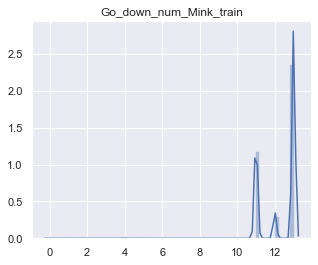

In [32]:
# Go_down_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(IF_train['Up_down'])).set_title("Go_down_num_Mink_train")

Text(0.5, 1.0, 'Go_down_num_Mink_test')

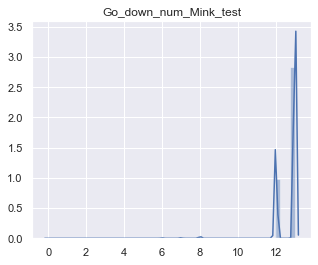

In [33]:
# Go_down_num
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(IF_test['Up_down'])).set_title("Go_down_num_Mink_test")